LSTM Problem Statement:

This assignment aims to utilize Long Short-Term Memory (LSTM) algorithms to perform next
word prediction on a given dataset. Next word prediction involves predicting the next word in a
sequence of text based on the preceding words. By implementing LSTM (Long Short-Term
Memory) networks, students are expected to learn how to process sequential data and capture
long-term dependencies for predicting the next word in a sentence.

In [1]:
# Step 1: Setup and Data Preparation

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
# Load the Dataset.

with open('/content/sample_data/LSTM DATA.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Split the text into sentences
sentences = text.split('\n')
# sentences

In [3]:
# Preprocess the Textual Data by Tokenizing and Generating Sequences.
# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(sentences)

# Define the vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # +1 for the padding token

# Create input sequences and corresponding labels
input_sequences = []
labels = []

for seq in sequences:
    for i in range(1, len(seq)):
        input_sequences.append(seq[:i])
        labels.append(seq[i])

# Pad sequences to ensure uniform input size
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# Convert labels to numpy array
labels = np.array(labels)

In [4]:
# Step 2: LSTM Model Architecture
# We'll define a simple LSTM architecture with one embedding layer, one LSTM layer, and one dense output layer.

# Step 3: Building the LSTM
# Define and Compile the LSTM Model.

# Define the LSTM model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, input_length=max_sequence_len),
    LSTM(128, return_sequences=False),
    Dense(vocab_size, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Step 4: Model Training
# Train the LSTM Model.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input_sequences, labels, test_size=0.2, random_state=42)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/10
757/757 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.0379 - loss: 6.7393 - val_accuracy: 0.0602 - val_loss: 6.1765
Epoch 2/10
757/757 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.0660 - loss: 5.9922 - val_accuracy: 0.0930 - val_loss: 5.8419
Epoch 3/10
757/757 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1052 - loss: 5.5590 - val_accuracy: 0.1133 - val_loss: 5.6404
Epoch 4/10
757/757 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.1250 - loss: 5.2942 - val_accuracy: 0.1248 - val_loss: 5.5501
Epoch 5/10
757/757 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.1397 - loss: 5.1026 - val_accuracy: 0.1299 - val_loss: 5.4964
Epoch 6/10
757/757 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.1529 - loss: 4.9509 - val_accuracy: 0.1345 - val_loss: 5.4666
Epoch 7/10
757/757 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.1646 - loss: 4.7922 - val_accuracy: 0.1398 - val_loss: 5.4550
Epoch 8/10
757/757 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1745 - loss: 4.6669 - val_accura

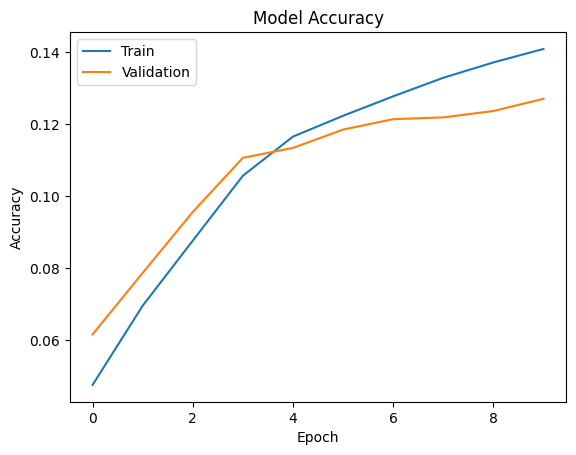

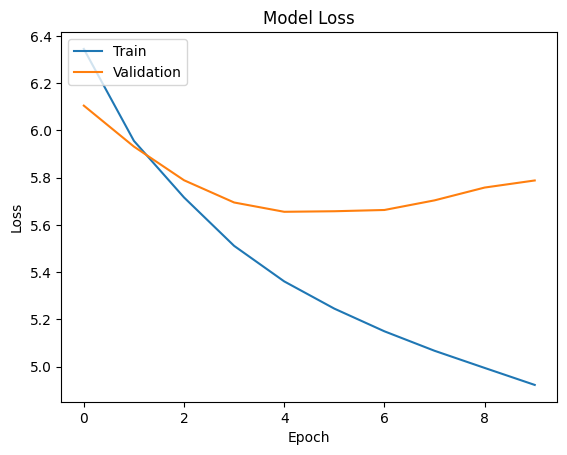

In [10]:
# 4.1 Monitor Training Progress.
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
# Step 5: Model Evaluation.
# Evaluate the model on the test data.

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


757/757 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1290 - loss: 5.8012
Test Accuracy: 0.1270


In [17]:
# Step 6: Fine-tuning and Optimization
# Fine-tune Hyperparameters
# You can experiment with different hyperparameters such as:

# Number of LSTM layers
# Number of hidden units
# Dropout rate
# Learning rate of the optimizer
# Batch size and number of epochs
# For example, you could add more layers or increase the number of hidden units:

# Fine-tuned model with more layers and dropout
# Fine-tuned model with more layers and dropout
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, input_length=max_sequence_len),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(vocab_size, activation='softmax')
])

# Compile the fine-tuned model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Retrain the model with new architecture
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1514/1514 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.0369 - loss: 6.6055 - val_accuracy: 0.0606 - val_loss: 6.1332
Epoch 2/10
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.0645 - loss: 6.0002 - val_accuracy: 0.0774 - val_loss: 5.9480
Epoch 3/10
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.0823 - loss: 5.7784 - val_accuracy: 0.0915 - val_loss: 5.8176
Epoch 4/10
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.0973 - loss: 5.5691 - val_accuracy: 0.1062 - val_loss: 5.7102
Epoch 5/10
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.1124 - loss: 5.3864 - val_accuracy: 0.1111 - val_loss: 5.6705
Epoch 6/10
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.1209 - loss: 5.2558 - val_accuracy: 0.1146 - val_loss: 5.6661
Epoch 7/10
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.1278 - loss: 5.1501 - val_accuracy: 0.1182 - val_loss: 5.6694
Epoch 8/10
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.1314 - loss: 5.06